<a href="https://colab.research.google.com/github/pratikbasnet2075/Clustering/blob/main/k_Means_Clustering_for_2_Features_with_k%3D2_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Centroids:
 [[1.48333333 1.71666667]
 [5.25       5.5       ]]
WCSS: 1.5516666666666667


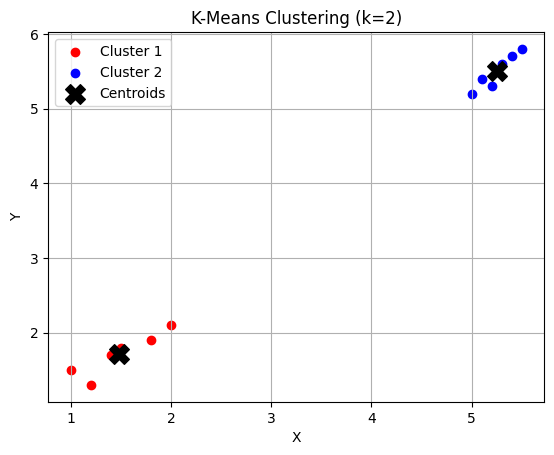

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset (x, y)
data = np.array([
    [1.0, 1.5], [1.5, 1.8], [1.2, 1.3], [1.4, 1.7], [5.0, 5.2], [5.5, 5.8],
    [5.2, 5.3], [5.4, 5.7], [2.0, 2.1], [1.8, 1.9], [5.1, 5.4], [5.3, 5.6]
])

# Parameters
k = 2
epochs = 100

# Randomly initialize k centroids
np.random.seed(0)
centroids = data[np.random.choice(range(len(data)), k, replace=False)]

for epoch in range(epochs):
    # Assign clusters
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    # Update centroids
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

    # Convergence check
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

# Compute WCSS (Within-Cluster Sum of Squares)
wcss = sum(np.sum((data[labels == i] - centroids[i]) ** 2) for i in range(k))
print("Final Centroids:\n", centroids)
print("WCSS:", wcss)

# Plot clusters
colors = ['red', 'blue']
for i in range(k):
    plt.scatter(data[labels == i][:, 0], data[labels == i][:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='black', s=200, label='Centroids')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()